# **TEAM #3**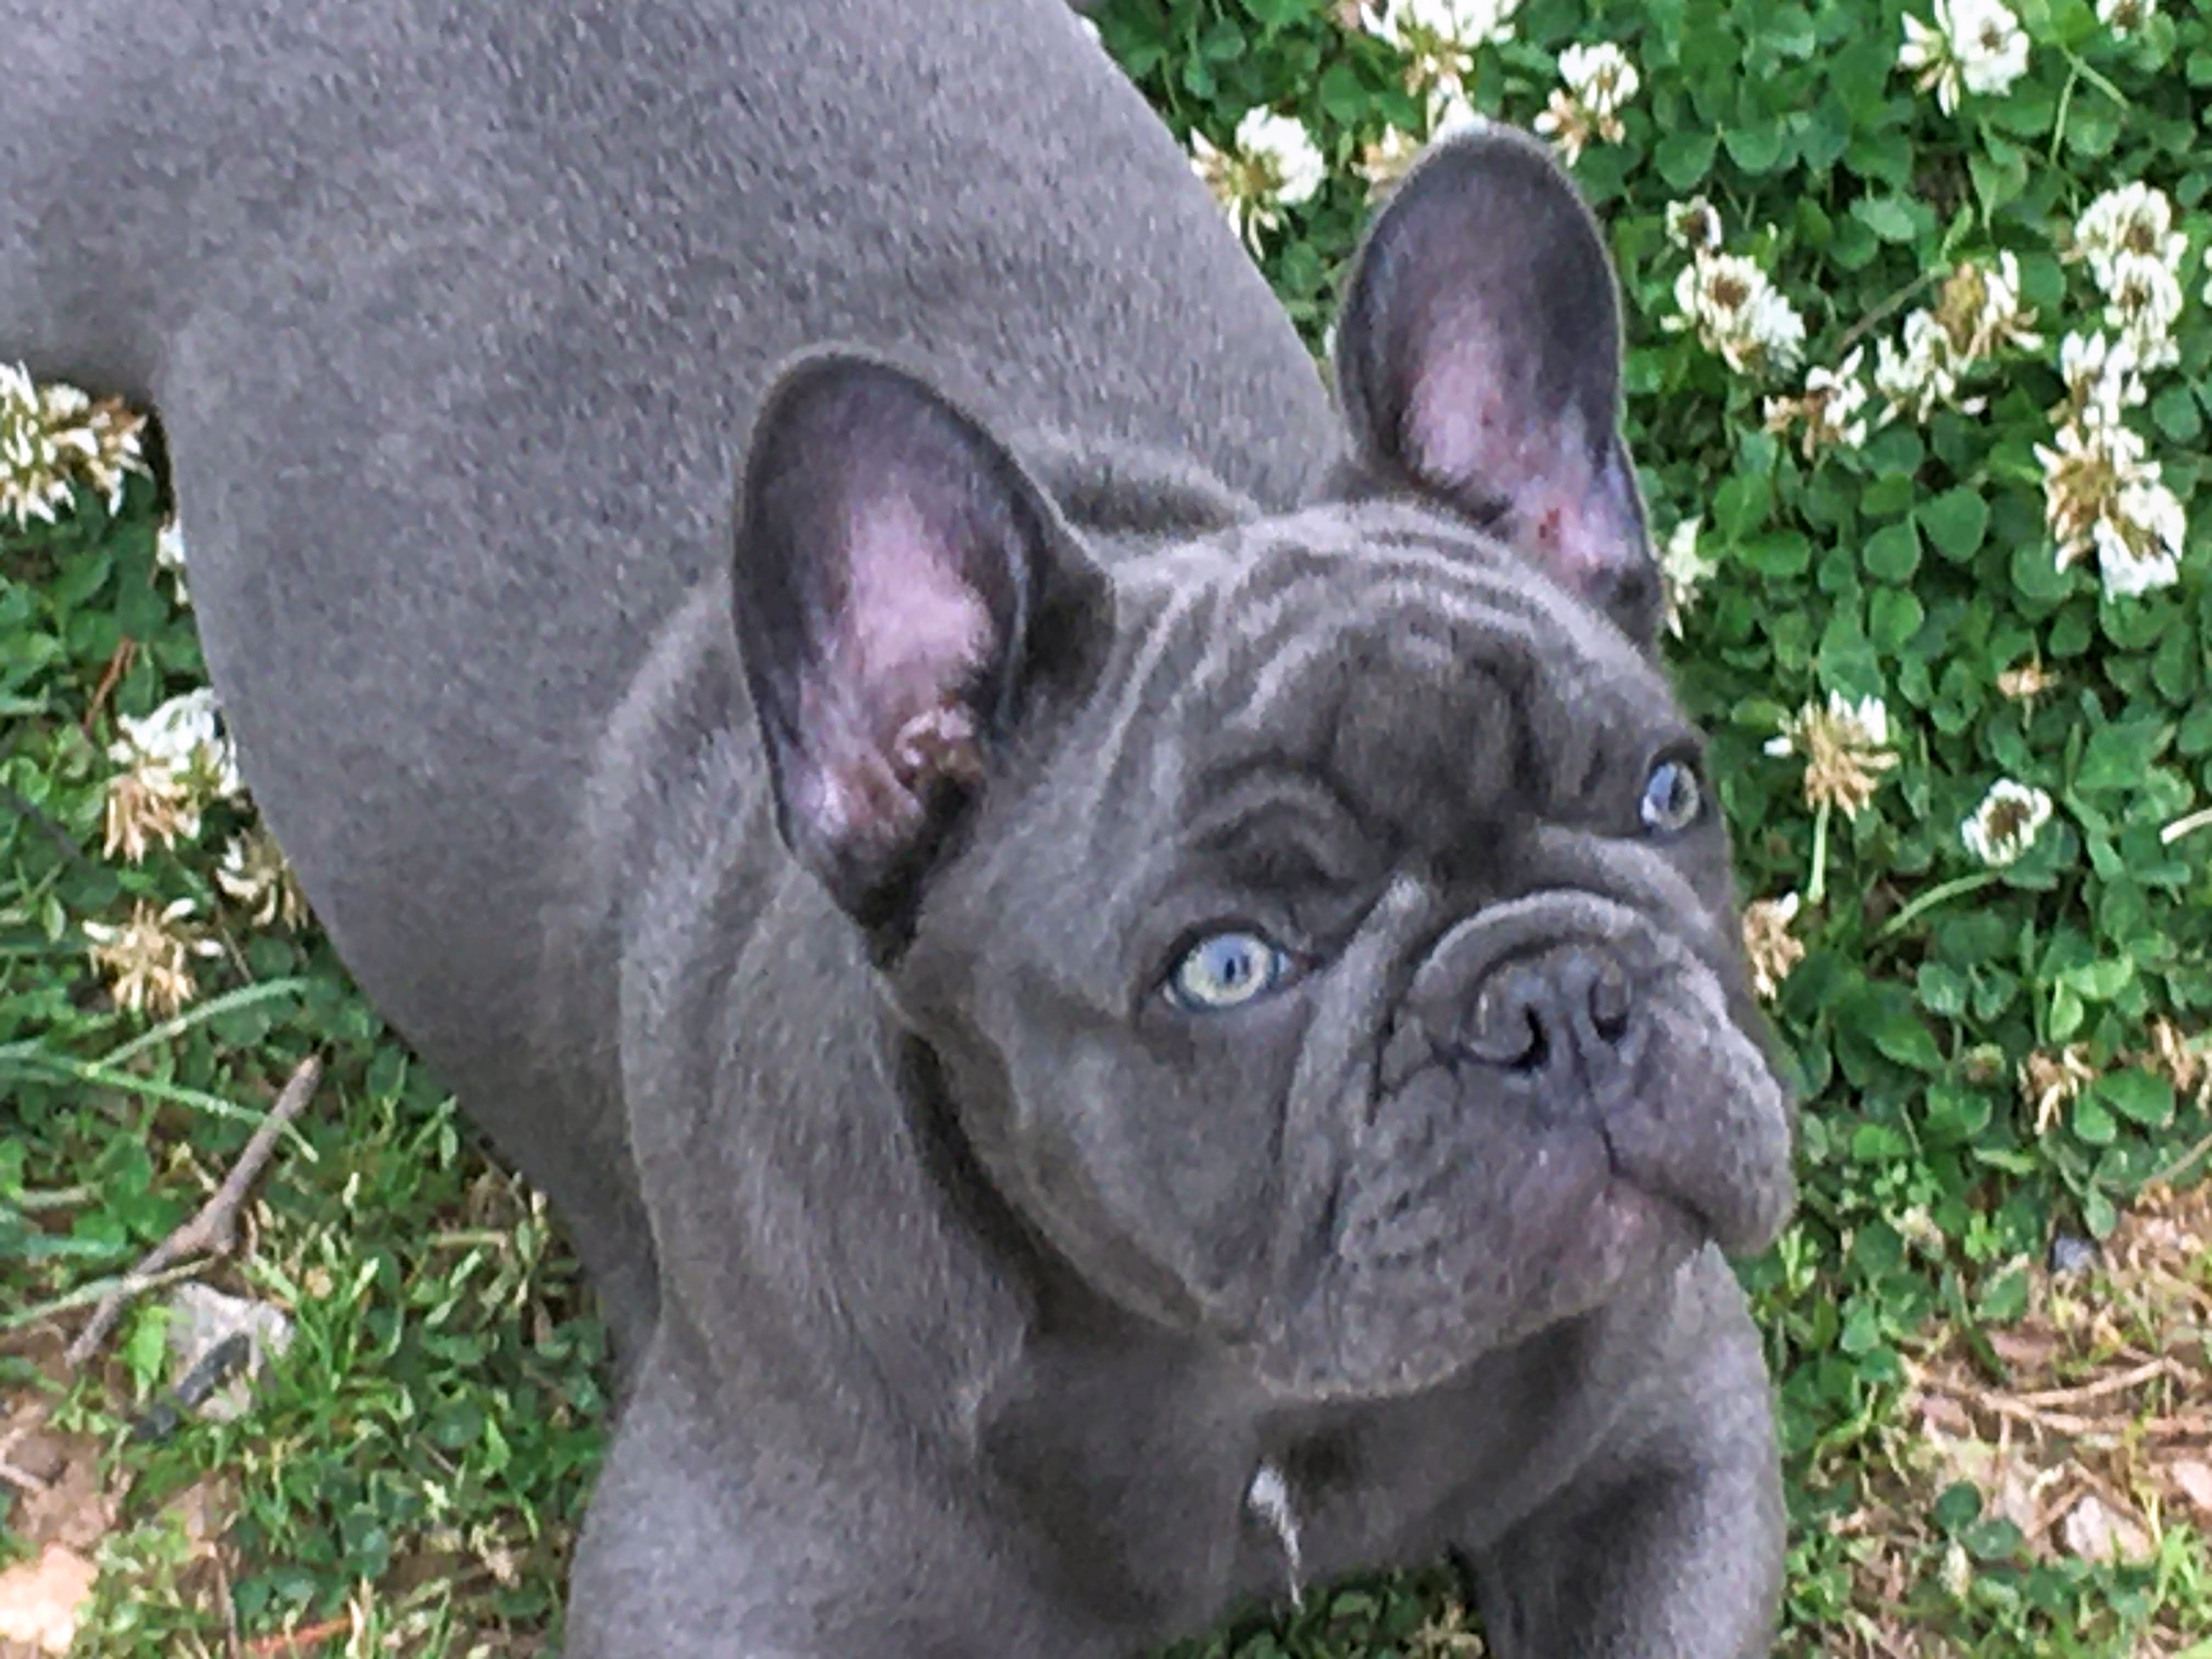

# 1. **Datasets** **& Packages Used**
Because I work on a Chromebook I have to load data a little differently since I have to use Google Colab instead of downloading Python packages to my computer directly.If you are using a Chromebook you will need to download dataset into your drive and set a directory path to retrieve dataset. Here is an example:

from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv("drive/My Drive/Notebooks/data/retail_sales_data.csv")





In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
df=pd.read_csv("drive/My Drive/Notebooks/data/retail_sales_data.csv")

# **2. Checking Dataset**
Make sure to check your dataset first thing using df.shape,df.columns,df.head and df.info. You can use df.info to see if you have NaN values or missing values in case you want to drop or fill in those missing values. Our dataset was clean.

In [70]:
df.head()

,Date,Product_ID,Product_Name,Category,Sales_Price,Cost_Price,Quantity_Sold,Inventory_Count
0,2023-01-01,1001,Product A,Electronics,500,350,20,100
1,2023-01-02,1002,Product B,Electronics,600,400,15,80
2,2023-01-03,1003,Product C,Clothing,50,30,50,200
3,2023-01-04,1004,Product D,Clothing,40,25,80,120
4,2023-01-05,1005,Product E,Home Decor,100,70,30,150


In [71]:
df.shape

(48, 8)

In [72]:
df.columns

Index(['Date', 'Product_ID', 'Product_Name', 'Category', 'Sales_Price',
       'Cost_Price', 'Quantity_Sold', 'Inventory_Count'],
      dtype='object')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             48 non-null     object
 1   Product_ID       48 non-null     int64 
 2   Product_Name     48 non-null     object
 3   Category         48 non-null     object
 4   Sales_Price      48 non-null     int64 
 5   Cost_Price       48 non-null     int64 
 6   Quantity_Sold    48 non-null     int64 
 7   Inventory_Count  48 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 3.1+ KB



# **Calculate the total sales revenue for each product category**
Using the **groupby** and **sum** functions plus the two columns below we were able to get the total sales revenue per category. Make sure to rename dataframe df1, df2, df3, etc...,because you will need to keep the original dataframe unchanged, below you can see we used df2, but you can use any name you like. To better familiarize yourself with the sum and groupby functions we recommend these great websites *https://realpython.com/python-sum-function/*, and *https://pandas.pydata.org/docs/user_guide/groupby.html*.

In [74]:
df2=df.groupby(['Category'])[['Sales_Price']].sum()
df2

,Sales_Price
Category,
Clothing,819
Electronics,8560
Home Decor,1930


***Task 1 is done***

# **Bar Chart Visualizing Total Sales Revenue For Each Category.**
For this bar chart we used a list for Category and Sales Price columns for x and y axes since there were only 3 values in each list. The reason we did a list is because we wanted values in a certain order to make bar chart more visually pleasing. We are using the data from df2 in task 1 and the package **matplotlib**  to create the bar chart below. We found this tutorial *https://www.geeksforgeeks.org/matplotlib-tutorial/* helpful if you are unfamiliar with this package. There are several other beginner tutorials and you tube videos on how to utilize **matplotlib** in making charts.There are also several other chart creating packages and libraries to choose from if you would like to get real creative with colors and different fonts. Do your own research to find what you like!

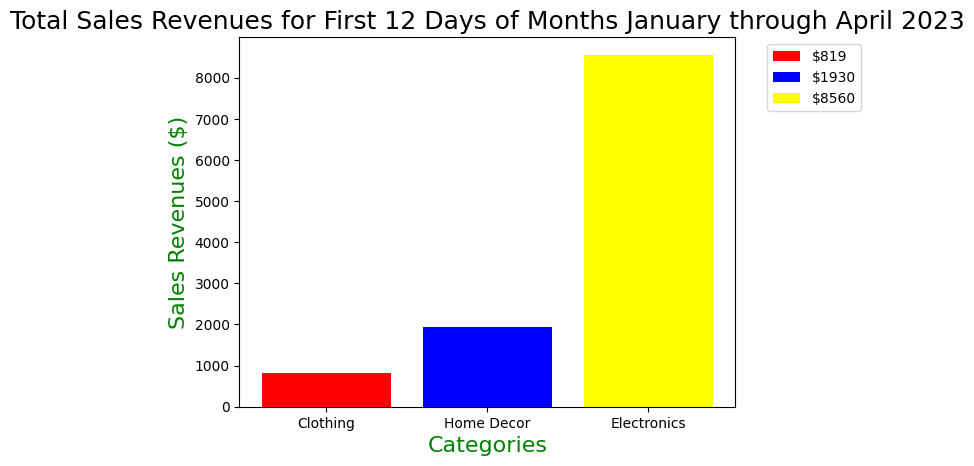

In [75]:
#Had to make several changes to graph because values on yaxis were not corresponding
# with total sales revenues of each category.Made a list of total sales revenues
# for each category and added legend. Added a few creative touches using different
#colors and fontsizes to present a more eye-pleasing graph.
Category=['Clothing','Home Decor','Electronics']
Sales_Price=['Sales_Revenues']
Sales_Revenues=(819,1930,8560)
bars=plt.bar(Category,Sales_Revenues, color=('red','blue','yellow'))
plt.ylabel("Sales Revenues ($)",color='green',fontsize=16)
plt.xlabel("Categories",color='green',fontsize=16)
plt.title("Total Sales Revenues for First 12 Days of Months January through April 2023", fontsize=18)
legend_labels=['$819','$1930','$8560']
legend_colors=['red','blue','gold']
plt.legend(bars,legend_labels,bbox_to_anchor=(1.05,1), loc= 'upper left')
plt.grid=(True)# Insructor recommended grid for this graph

The **largest Sales Revenues** from January through April was in  **Electronics**

**Task 2 is done**

# **Extracting Highest or Lowest Values drom a Dataframe.**
One way to extract a particular number of highest or lowest values in a dataframe is by using the **nlargest**() or **nsmallest**() function. For this particular task I needed to extract top 5 selling products, using the code below to do so. The **nlargest**() method returns a specified number of rows, starting at the top after sorting the DataFrame by the highest value for a specified column.

In [76]:
cindy=(df[['Quantity_Sold','Product_Name']]).nlargest(5,['Quantity_Sold'])
cindy

,Quantity_Sold,Product_Name
3,80,Product D
15,78,Product D
27,75,Product D
21,72,Product J
39,72,Product D


More clothing items were sold  in the time period from January to April when compared to Home Decor or Electronics. Product D which is clothing, is an especially popular item even after the modest price increase in the following months. Product J which is another clothing item  is also a big seller in the same time period.

***Task 3 is done***

# **Datetime for Formatting a Date Column or Creating a Month Column**
 We needed to create a line chart to visualize the trend of total sales revenue over the four months. We realized there was no Month column so we did a little research and found this useful reference *https://pandas.pydata.org/docs/getting_startedintro_tutorials/09_timeseries.html* on how to utilize the **datetime** function.. From creating a new **Month Column** to changing **date format** for your different graphs this function is handy. Once we had our Month column we could now use **groupby** function and **sum** function to get total sales revenues for each month.


In [77]:
from datetime import datetime
df['Month']=pd.DatetimeIndex(df['Date']).month
df1=df['Month']=pd.DatetimeIndex(df['Date']).month
df1

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
            2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
            4, 4, 4, 4],
           dtype='int64', name='Date')

In [78]:

df1=pd.DataFrame({'Month':[1,2,3,4]})
month_mapping = {1:'January',2:'February',3:'March',4:'April'}
df['Month']=df['Month'].map(month_mapping)
df.head()


,Date,Product_ID,Product_Name,Category,Sales_Price,Cost_Price,Quantity_Sold,Inventory_Count,Month
0,2023-01-01,1001,Product A,Electronics,500,350,20,100,January
1,2023-01-02,1002,Product B,Electronics,600,400,15,80,January
2,2023-01-03,1003,Product C,Clothing,50,30,50,200,January
3,2023-01-04,1004,Product D,Clothing,40,25,80,120,January
4,2023-01-05,1005,Product E,Home Decor,100,70,30,150,January


In [79]:
df.groupby(['Month'])[['Sales_Price']].sum()

,Sales_Price
Month,
April,2921
February,2812
January,2755
March,2821


Text(0.5, 1.0, ' Sales Revenue Trend Over 4 Months')

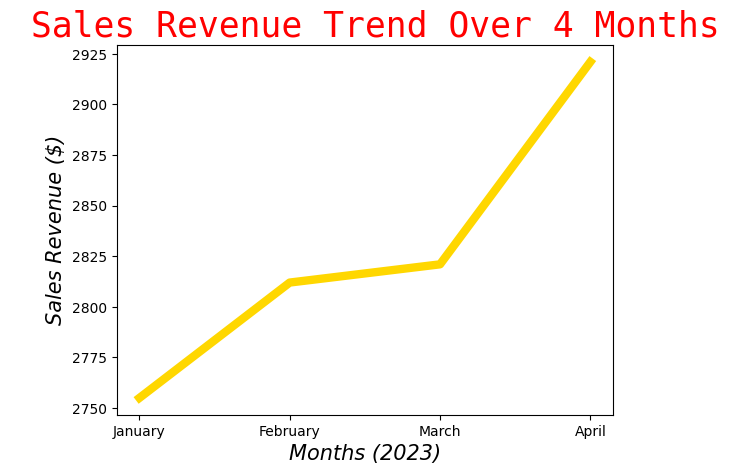

In [80]:
from matplotlib.font_manager import FontProperties#wanted more font choices to make chart more visually pleasing.
monospace={'fontfamily':'monospace'}
oblique_style={'fontstyle':'oblique'}
monthly_total_sales=df.groupby('Month')['Sales_Price'].sum()
monthly_total_sales=monthly_total_sales.sort_values()
y=[2755,2812,2821,2921]
Month=['January','February','March','April']
plt.plot(monthly_total_sales.index,monthly_total_sales,linewidth=6,color='gold')
plt.xlabel('Months (2023)',color='black',fontsize=15, fontdict=oblique_style)
plt.ylabel('Sales Revenue ($)',fontsize=15, color='black',fontdict=oblique_style)
plt.title(' Sales Revenue Trend Over 4 Months',fontdict=monospace ,fontsize=25,color='red')

The overall trend is **positive** with **largest** increase in sales from March-April.

**Task 4 is done.**

# **Calculate the profit (sales revenue - cost price) for each product and find the product with the highest profit**.
By using the simple code and equation below we were able to unknowingly create a Profit column for our dataframe.Pretty cool! The next step was to find product with highest profit and for that we used the **idxmax** function. This website provides some insight into idxmax usage **https://www.statology.org/idxmax-pandas/**.

In [81]:
df['Profit'] = df['Sales_Price'] - df['Cost_Price']
df.head()

,Date,Product_ID,Product_Name,Category,Sales_Price,Cost_Price,Quantity_Sold,Inventory_Count,Month,Profit
0,2023-01-01,1001,Product A,Electronics,500,350,20,100,January,150
1,2023-01-02,1002,Product B,Electronics,600,400,15,80,January,200
2,2023-01-03,1003,Product C,Clothing,50,30,50,200,January,20
3,2023-01-04,1004,Product D,Clothing,40,25,80,120,January,15
4,2023-01-05,1005,Product E,Home Decor,100,70,30,150,January,30


In [82]:
max_profit_product=df.loc[df['Profit'].idxmax()]['Product_Name']
max_profit_product

'Product B'

Electronics is where the largest profits are made, and Product B is a consistent seller even when the price increases ten,twenty, or thirty dollars in months from January to April of 2023.

***Task 5 is done***

# **Explore the Distribution of Sales Prices and Create a Histogram.**
We wanted to look at the distribution of sales prices before we created histogram graph to ensure our histogram would accurately reflect the data, so we used the **describe** function on the Sales_Price column to analyze data. We created a very simple and easy to read graph below using matplotlib which we imported earlier.

In [83]:
statistics = df['Sales_Price'].describe()
statistics

count     48.000000
mean     235.604167
std      218.200546
min       40.000000
25%       57.250000
50%      121.000000
75%      485.000000
max      620.000000
Name: Sales_Price, dtype: float64

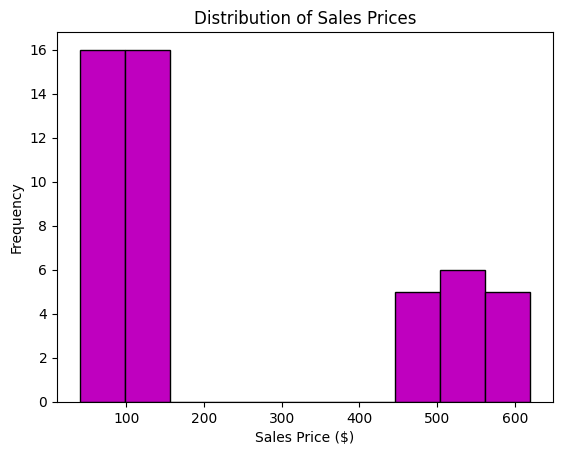

In [84]:
plt.hist(df['Sales_Price'], bins=10, color='m', edgecolor='black')
plt.title('Distribution of Sales Prices')
plt.xlabel('Sales Price ($)')
plt.ylabel('Frequency')
plt.show()

Most of the customer base is spending in the price range of around fifty to one-hundred and fifty dollar range. Some customers are spending on the bigger ticket items in Electronics ranging from around 410-620 dollars. This graph shows that there is a missed opportunity to stock inventory in the approximate price range of $200-400 to increase profits.If the store is stocking inventory in this price range,then why aren't those items selling?

**Task 6 is done.**

# **Determine the Days with the Highest and Lowest Total Sales Revenue and Visualize it on a Line Plot.**
We used **.idxmax** and **.idxmin** functions to determine the days with highest and lowest sales revenues. This website, *https://proclusacademy.com/blog/quicktip/pandas-idxmin-idxmax/* gives a good tutorial on both functions and their utility. Using code below we were able to plot a line graph to visualize the data. We are sure there is a simpler way to plot this line graph but after hours of trying different ways to plot our data we came up with the following line graph. We used the **concatenate** function *https://www.pythontutorial.net/python-string-methods/python-string-concatenation/*to merge our data and  **imported date and month formatter from matplotlib** to reformat date into month. *https://matplotlib.org/stable/api/dates_api.html* This was a lot of work for such a simple line graph. Look forward to any feedback on this one!


In [85]:
df.loc[df['Sales_Price'].idxmax(),['Sales_Price','Date']].reset_index()

,index,37
0,Sales_Price,620
1,Date,2023-04-02


In [86]:
df.loc[df['Sales_Price'].idxmin(),['Sales_Price', 'Date']].reset_index()

,index,3
0,Sales_Price,40
1,Date,2023-01-04


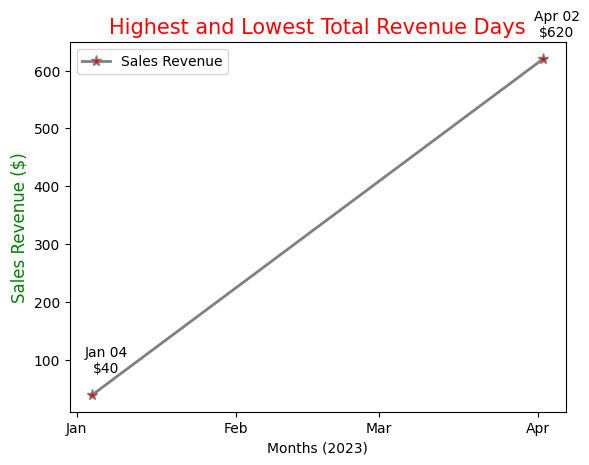

In [87]:
lowest_date = df.loc[df['Sales_Price'].idxmin(), 'Date']
lowest_sales = df['Sales_Price'].min()
highest_date = df.loc[df['Sales_Price'].idxmax(), 'Date']
highest_sales = df['Sales_Price'].max()
# Create DataFrames for lowest and highest revenues
lowest_df = pd.DataFrame({'Date': [lowest_date], 'Sales_Price': [lowest_sales]})
highest_df = pd.DataFrame({'Date': [highest_date], 'Sales_Price': [highest_sales]})
# Concatenate DataFrames
merged_df = pd.concat([lowest_df, highest_df])
# Convert the 'Date' column to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
plt.plot(merged_df['Date'], merged_df['Sales_Price'],color='gray', marker='*', linestyle='-', linewidth=2, markersize=8, label='Sales Revenue',markerfacecolor='red')
for index, row in merged_df.iterrows():
    date_str = row['Date'].strftime('%b %d')  # Format to month name and day
    plt.annotate(f"{date_str}\n${row['Sales_Price']}",
                 (row['Date'], row['Sales_Price']),
                 textcoords="offset points",
                 xytext=(10,16),
                 ha='center')
    from matplotlib.dates import MonthLocator, DateFormatter
    locator = MonthLocator()
formatter = DateFormatter('%b')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xlabel('Months (2023)')
plt.ylabel('Sales Revenue ($)', fontsize=12, color='g')
plt.title('Highest and Lowest Total Revenue Days',fontsize=15, color='red')
plt.legend()
plt.show()

# **Calculate the Total Sales Revenue for Each Month and Present the Results in a Line Plot to Identify any Trends or Seasonality.**
Using same code to extract total sales revenue for each month and the same line graph as in task 4 we are  asked to identify any trends or seasonality. Although, we did add some creative touches to line graph the **main difference** in Task 4 and this one is in the **analysis**. See analysis for this task and task 4 and notice a more in=depth analysis for this task.

In [88]:
df.groupby(['Month'])[['Sales_Price']].sum()

,Sales_Price
Month,
April,2921
February,2812
January,2755
March,2821


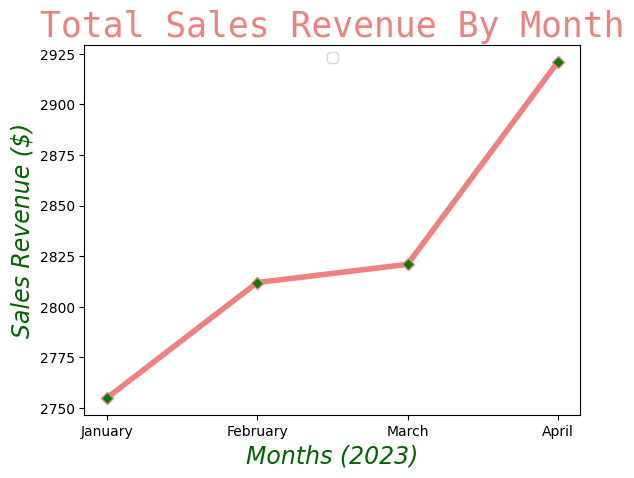

In [89]:

from matplotlib.font_manager import FontProperties
monospace={'fontfamily':'monospace'}
oblique_style={'fontstyle':'oblique'}
Month=['January','February','March','April',]
Sales_Price=[2755,2812,2821,2921]
plt.plot(Month,Sales_Price,marker='D',linewidth=4,markerfacecolor='green',color='lightcoral')
plt.xlabel('Months (2023)',color='darkgreen',fontsize=17, fontdict=oblique_style)
plt.ylabel('Sales Revenue ($)',fontsize=17, color='darkgreen',fontdict=oblique_style)
plt.title('Total Sales Revenue By Month',fontdict=monospace ,fontsize=25,color='lightcoral')
plt.legend(loc='upper center')


The overall trend is positive, with the largest increases in revenues occuring in the months from **January-February** and from **March-April.** In **January-February** we see approximately a **70 dollar increase in revenues**, and this was probably due to Christmas returns and customers buying warm clothing items for winter. In **March-April** the store made a **hundred dollar increase** in revenues which is due to customers buying clothing suitable for warmer weather, it is also when customers are getting their tax returns.The store only saw an increase of approximately **10 dollars** from **February-March**. The store should try doing something very **creative** with **Valentines Day** to see if we can boost sales for **February-March** in 2024.

**Task 8 is done.**

# **Compute the Average Sales Price for Each Product Category and Create a Bar Chart to Visualize it**.
For this task we utilize the **groupby** function again along with the **mean** function to get average sales price for each category. More about the mean function here *https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html*. Now that we have the average cost of each category we can create a bar chart to visualize data using matplotlib. On a bigger dataset I would not recommend using lists to create charts, but because we wanted average sales prices and categories in a particular order and the number of values needed were small we defined data for this bar chart. Also, if you look at codes to create chart you will see that we had fun with colors and fontsizes to create a colorful bar chart.

In [90]:
average_prices=df.groupby('Category')[['Sales_Price']].mean()
average_prices

,Sales_Price
Category,
Clothing,51.1875
Electronics,535.0000
Home Decor,120.6250


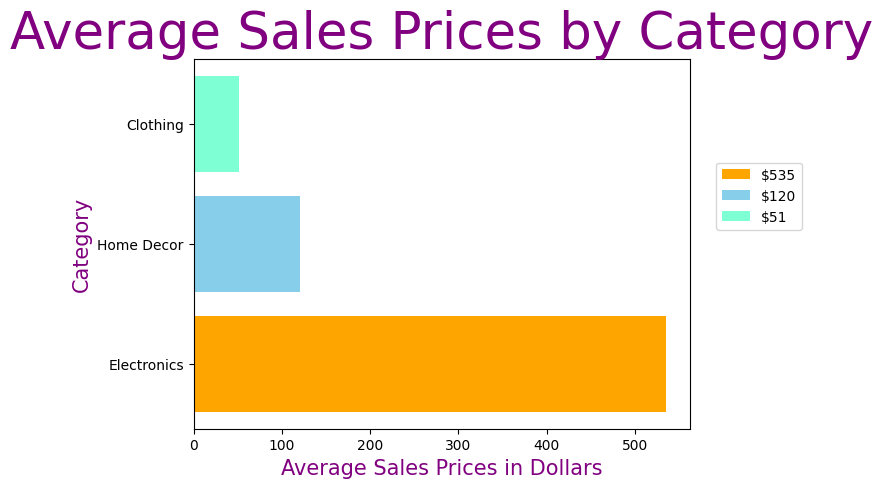

In [91]:
categories=['Electronics','Home Decor','Clothing']#list created
average_prices=[535,120,51]#list created
colors=['orange','skyblue','aquamarine']
bars=plt.barh(categories,average_prices,color=colors)
plt.ylabel('Category',fontsize=15,color='purple')
plt.xlabel('Average Sales Prices in Dollars',fontsize=15,color='purple')
plt.title('Average Sales Prices by Category',fontsize=37,color='purple')
legend_labels=['$535','$120','$51']
legend_colors=['aquamarine','skyblue','pink']
plt.legend( bars, legend_labels,bbox_to_anchor=(1.24,0.52,),loc= 'lower right')
plt.grid=(True)

As with the histogram chart earlier that showed the distribution of sales there are no sales in the **average price range** of **$200-400,** either due to the type of inventory the store is stocking or it is possible the store is not stocking enough/any inventory in this price range.

**Task 9 is done**

# **Conduct a Correlation Analysis to Investigate the Relationship Between Sales Price and Quantity Sold.**
Before making the scatterplot we need to determine how positive or negative the correlation is between the sales price and the quantity sold. We use the **.corr** function in the code below to get our data.More about different correlation methods here *https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html*. For our purposes the pearson correlation method was used. Where 1 is a very positive correlation meaning that the two variables are related, and -1 meaning that the two variable have a very negative correlation and are unrelated. As you can see we get a -0.7 meaning the two variables have a stong negative correlation or are unrelated to the other. Once we create scatterplot to visualize the data we can confirm our observation.


In [92]:
correlation=df['Sales_Price'].corr(df['Quantity_Sold'])
correlation

-0.716588779596294

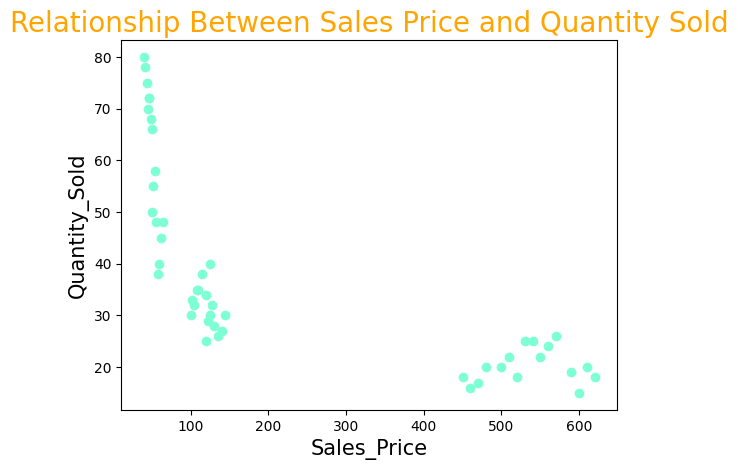

In [93]:
plt.scatter(df['Sales_Price'], df['Quantity_Sold'], color='aquamarine')
plt.title('Relationship Between Sales Price and Quantity Sold',color='orange', fontsize=20)
plt.xlabel('Sales_Price', fontsize =15)
plt.ylabel('Quantity_Sold', fontsize=15)
plt.show()

There is a **strong negative correlation** between the Sales Price and the Quantity Sold. We can predict that the store does not base its sales prices on the quantity of any particular product it sells.